# **Baseline CNN Model**

Note: the baseline model is meant to be a minimal, unoptimized reference — just to check pipeline sanity (data → model → training → results)

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_dataset.zip to processed_dataset.zip


In [ ]:
import zipfile
import os

zip_path = "processed_dataset.zip"
extract_path = "processed_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: processed_dataset


### **Load Processed Images**

In [ ]:
def load_processed_images(data_dir, img_size=(128, 128)):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_path, img_file)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img = cv2.resize(img, img_size)
                        img = img.astype('float32') / 255.0
                        X.append(img)
                        y.append(class_idx)

    return np.array(X), np.array(y), class_names

In [ ]:
import os

print("Classes found in dataset folder:")
print(os.listdir("processed_dataset/processed_dataset"))

Classes found in dataset folder:
['028', '007', '001', '011', '041', '023', '033', '037', '039', '004', '019', '027', '025', '016', '040', '029', '013', '002', '010', '014', '035', '009', '034', '031', '020', '036', '015', '026', '012', '017', '008', '024', '022', '032', '005', '021', '006', '018', '003', '038', '030']


### **Load Data**

In [ ]:
data_path = "processed_dataset/processed_dataset"
X, y, class_labels = load_processed_images(data_path)

### **Add Channel Dimension**

In [ ]:
X = X.reshape(-1, 128, 128, 1)
y = to_categorical(y, num_classes=len(class_labels))

### **Train/Test Split**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")

Train shape: (1289, 128, 128, 1), Validation shape: (323, 128, 128, 1)


### **Build Baseline CNN**

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,397,033 (28.22 MB)

 Trainable params: 7,397,033 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

### **Train Model**

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - accuracy: 0.0299 - loss: 3.8269 - val_accuracy: 0.2755 - val_loss: 3.4304
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 229ms/step - accuracy: 0.3029 - loss: 2.8646 - val_accuracy: 0.6471 - val_loss: 1.8355
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.6842 - loss: 1.3009 - val_accuracy: 0.7895 - val_loss: 0.8851
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.7905 - loss: 0.7645 - val_accuracy: 0.8452 - val_loss: 0.6882
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - accuracy: 0.8768 - loss: 0.4334 - val_accuracy: 0.8607 - val_loss: 0.5908
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - accuracy: 0.9192 - loss: 0.2909 - val_accuracy: 0.8390 - val_loss: 0.6378
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.9329 - loss: 0.1972 - val_accuracy: 0.8545 - val_loss: 0.6632
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 238ms/step - accuracy: 0.9358 - loss: 0.2286 - val_accu

####**Performance Summary**
Initial accuracy was ~2.7% (random guessing)

Best validation accuracy: ~84.5% at Epoch 7–8

Final training accuracy: 94.5%

Slight overfitting begins after epoch 8 (train accuracy increases but val accuracy plateaus or dips)

### **Plot Accuracy and Loss**

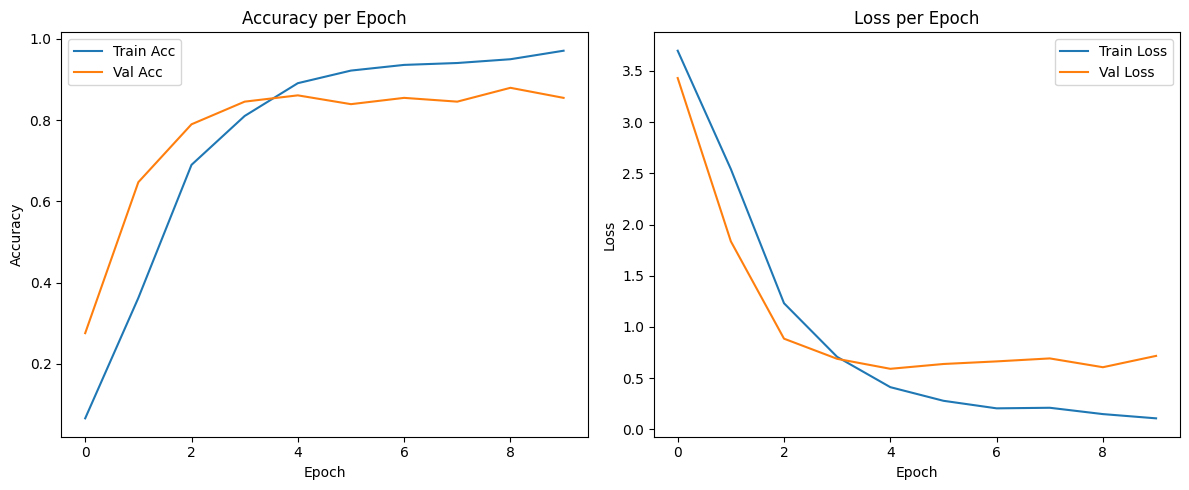

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **Prepare labeled dataset split (train/test)**

In [ ]:
import os
import cv2
import numpy as np

def load_dataset(path):
    X = []
    y = []
    for label in os.listdir(path):
        label_path = os.path.join(path, label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None: # Check if image is loaded successfully
                    img = cv2.resize(img, (128, 128))
                    X.append(img)
                    y.append(label)
                else:
                    print(f"Warning: Could not load image {img_path}") # Optional: print a warning

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset("processed_dataset/processed_dataset")
X = X.astype("float32") / 255.0
X = X[..., np.newaxis]  # Add channel

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, stratify=y_cat, test_size=0.2, random_state=42
)

print("Data loaded successfully")
print("X shape:", X.shape)
print("Unique labels:", le.classes_)

Data loaded successfully
X shape: (1612, 128, 128, 1)
Unique labels: ['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' '040' '041']


### **Handle stratification (user-wise)**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load palm vein images from subfolders (user-wise)
def load_dataset(path):
    X, y = [], []
    for label in sorted(os.listdir("processed_dataset/processed_dataset")):
        user_path = os.path.join(path, label)
        if not os.path.isdir(user_path): continue
        for img_name in os.listdir(user_path):
            img_path = os.path.join(user_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                X.append(img)
                y.append(label)
            else:
                print(f"Warning: could not load image {img_path}")
    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset("processed_dataset/processed_dataset")
X = X.astype("float32") / 255.0
X = X[..., np.newaxis]  # Add channel

# Encode user IDs as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Stratified train-test split (user-wise)
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

# One-hot encode after splitting
y_train = to_categorical(y_train_enc)
y_test = to_categorical(y_test_enc)

# Check distribution
unique_train, train_counts = np.unique(y_train_enc, return_counts=True)
unique_test, test_counts = np.unique(y_test_enc, return_counts=True)

print("Stratified Split Completed")
print("Total Users:", len(le.classes_))
print("X shape:", X.shape)
print("Train distribution:", dict(zip(le.inverse_transform(unique_train), train_counts)))
print("Test distribution:", dict(zip(le.inverse_transform(unique_test), test_counts)))


Stratified Split Completed
Total Users: 41
X shape: (1612, 128, 128, 1)
Train distribution: {np.str_('001'): np.int64(32), np.str_('002'): np.int64(32), np.str_('003'): np.int64(32), np.str_('004'): np.int64(32), np.str_('005'): np.int64(32), np.str_('006'): np.int64(32), np.str_('007'): np.int64(32), np.str_('008'): np.int64(32), np.str_('009'): np.int64(32), np.str_('010'): np.int64(32), np.str_('011'): np.int64(32), np.str_('012'): np.int64(32), np.str_('013'): np.int64(32), np.str_('014'): np.int64(32), np.str_('015'): np.int64(32), np.str_('016'): np.int64(32), np.str_('017'): np.int64(32), np.str_('018'): np.int64(32), np.str_('019'): np.int64(32), np.str_('020'): np.int64(32), np.str_('021'): np.int64(9), np.str_('022'): np.int64(32), np.str_('023'): np.int64(32), np.str_('024'): np.int64(32), np.str_('025'): np.int64(32), np.str_('026'): np.int64(32), np.str_('027'): np.int64(32), np.str_('028'): np.int64(32), np.str_('029'): np.int64(32), np.str_('030'): np.int64(32), np.str_(

### **Plot confusion matrix and sample predictions**

In [ ]:
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step


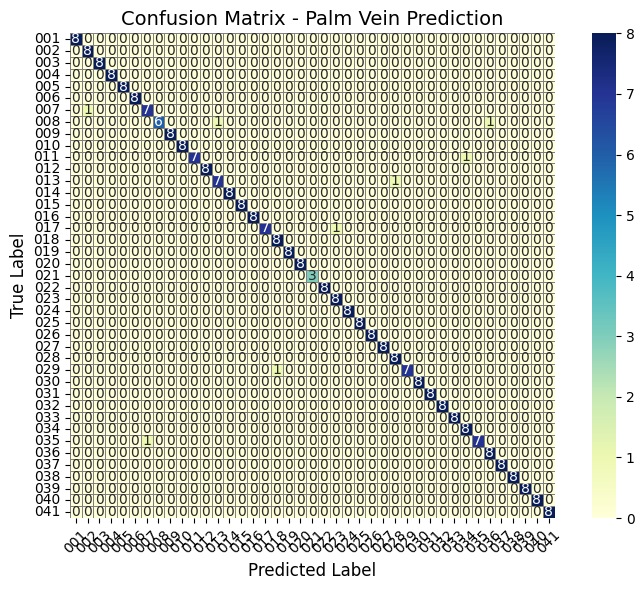

In [ ]:
# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
labels = le.classes_

# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=labels, yticklabels=labels, cbar=True,
            linewidths=0.5, linecolor='gray', square=True)

plt.title("Confusion Matrix - Palm Vein Prediction", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


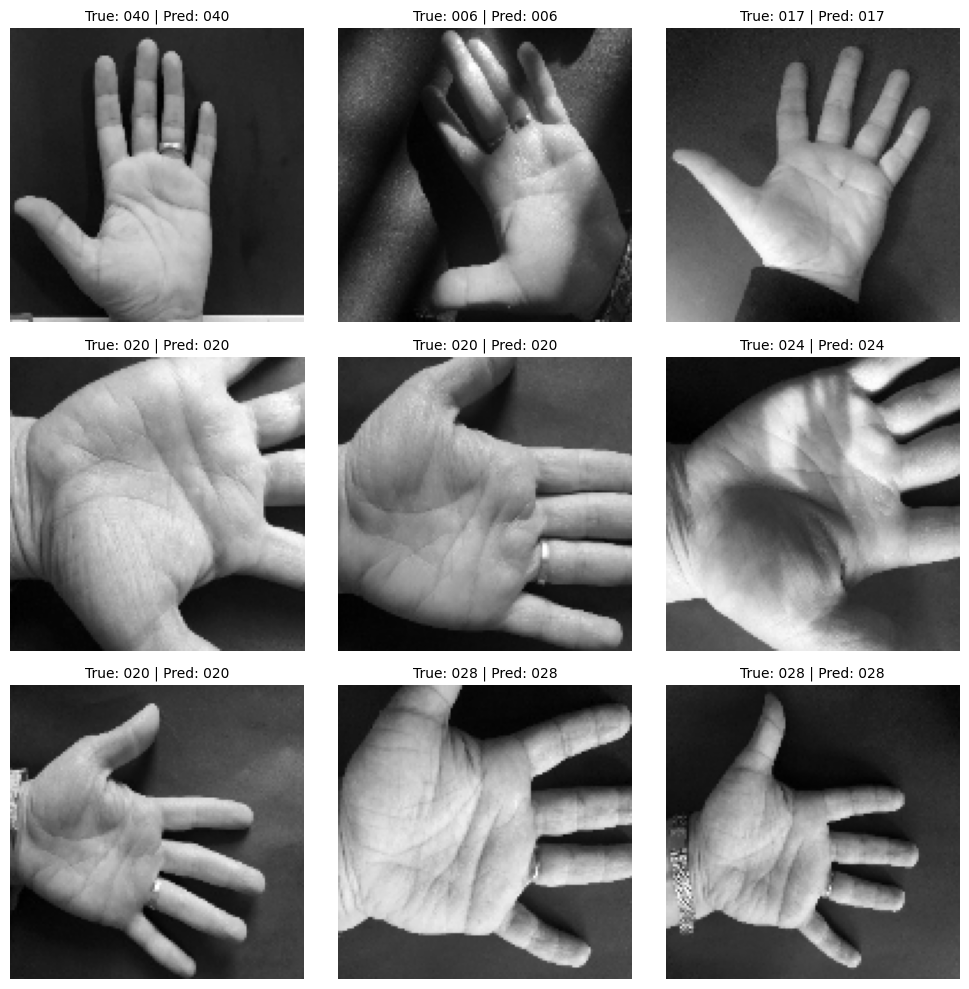

In [ ]:
def show_sample_predictions(X, y_true, y_pred, label_encoder, num=9):
    import matplotlib.pyplot as plt
    idxs = np.random.choice(len(X), num, replace=False)
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(idxs):
        true_lbl = label_encoder.inverse_transform([y_true[idx]])[0]
        pred_lbl = label_encoder.inverse_transform([y_pred[idx]])[0]
        plt.subplot(3, 3, i+1)
        plt.imshow(X[idx].squeeze(), cmap='gray')
        plt.title(f"True: {true_lbl} | Pred: {pred_lbl}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 9 sample test images with prediction
show_sample_predictions(X_test, y_true_labels, y_pred_labels, le)
